# Project: Fruit detection

The model should be able to detect multiple fruits in a single picture. 
The concept is that the model should be used in super markets for self checkout so the shopping experience will get easier. 
Here the model will detect the fruits automatically instead of the customer manually writing how many of a certian fruit they have bought. 
Furthermore the model could be used by cashiers, so they also wouldn't have to write in a specific number that represents a fruit. 
In general the model could be expanded to detect any product without a barcode.




Including libraries

In [1]:
import os
from time import time
from tqdm import tqdm
import numpy

import torch
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torchvision.transforms import transforms

# Preparing data
Creating merged images with 2-6 random fruits in them, and creating a csv file to keep track of number of fruits (labels) in each of the images 

In [6]:
from random import seed
from random import randint
import random
import array as arr
from PIL import Image
import csv
import numpy as np

f = open('training_classes.csv', 'w', newline='')
writer = csv.writer(f)

for i in range (2500):
    numberOfFruits = randint(2, 6)
    img = []
    classes = [0, 0, 0, 0, 0]       # [Apple, Clem, Kiwi, Orange, Pear]

    for j in range(numberOfFruits):
        path = 'Training'
        subFolder = os.listdir(path)
        pathSubFolder = random.choice(subFolder)
        path = path + "/" + pathSubFolder

        if pathSubFolder == "Apple Pink Lady":
            classes[0] = classes[0] + 1
        elif pathSubFolder == "Clementine":
            classes[1] = classes[1] + 1
        elif pathSubFolder == "Kiwi":
            classes[2] = classes[2] + 1
        elif pathSubFolder == "Orange":
            classes[3] = classes[3] + 1
        elif pathSubFolder == "Pear":
            classes[4] = classes[4] + 1

        images = os.listdir(path)
        rndImage = random.choice(images)

        img.append(Image.open(path+"/"+rndImage))

    img_size = img[0].size
    new_image = Image.new('RGB',(6*img_size[0], 6*img_size[1]), (250,250,250))
    
    rndVec = np.zeros((numberOfFruits, 2), dtype=int)

    for j in range(numberOfFruits):
        rndVec[j] = np.random.randint(6, size=2)

        for u in range(j):
            if j != u: 
                while rndVec[j][0] == rndVec[u][0] and rndVec[j][1] == rndVec[u][1]:
                    rndVec[j] = np.random.randint(6, size=2)

        if j > 2:
            new_image.paste(img[j], (img_size[0]*rndVec[j][0],img_size[1]*rndVec[j][1]))
        else:
            new_image.paste(img[j], (img_size[0]*rndVec[j][0],img_size[1]*rndVec[j][1]))

    string = 'training_merged_images/mergedImage_{}.jpg'.format(i)
    new_image.save(string, "JPEG")

    line = ['mergedImage_{}'.format(i), classes]
    writer.writerow(line)

Doing the same for validation set

In [8]:
f = open('validation_classes.csv', 'w', newline='')
writer = csv.writer(f)

for i in range (500):
    numberOfFruits = randint(2, 6)
    img = []
    classes = [0, 0, 0, 0, 0]       # [Apple, Clem, Kiwi, Orange, Pear]

    for j in range(numberOfFruits):
        path = 'Validation'
        subFolder = os.listdir(path)
        pathSubFolder = random.choice(subFolder)
        path = path + "/" + pathSubFolder

        if pathSubFolder == "Apple Pink Lady":
            classes[0] = classes[0] + 1
        elif pathSubFolder == "Clementine":
            classes[1] = classes[1] + 1
        elif pathSubFolder == "Kiwi":
            classes[2] = classes[2] + 1
        elif pathSubFolder == "Orange":
            classes[3] = classes[3] + 1
        elif pathSubFolder == "Pear":
            classes[4] = classes[4] + 1

        images = os.listdir(path)
        rndImage = random.choice(images)

        img.append(Image.open(path+"/"+rndImage))

    img_size = img[0].size
    new_image = Image.new('RGB',(6*img_size[0], 6*img_size[1]), (250,250,250))

    rndVec = np.zeros((numberOfFruits, 2), dtype=int)

    for j in range(numberOfFruits):
        rndVec[j] = np.random.randint(6, size=2)

        for u in range(j):
            if j != u: 
                while rndVec[j][0] == rndVec[u][0] and rndVec[j][1] == rndVec[u][1]:
                    rndVec[j] = np.random.randint(6, size=2)

        if j > 2:
            new_image.paste(img[j], (img_size[0]*rndVec[j][0],img_size[1]*rndVec[j][1]))
        else:
            new_image.paste(img[j], (img_size[0]*rndVec[j][0],img_size[1]*rndVec[j][1]))

    string = 'validation_merged_images/mergedImage_{}.jpg'.format(i)
    new_image.save(string, "JPEG")

    line = ['mergedImage_{}'.format(i), classes]
    writer.writerow(line)

In [149]:
f = open('test_classes.csv', 'w', newline='')
writer = csv.writer(f)
line = ['0_1_1_0_2'.format(), [0, 1, 1, 0, 2]]
writer.writerow(line)
line = ['0_1_1_0_2_a'.format(), [0, 1, 1, 0, 2]]
writer.writerow(line)
line = ['0_1_1_1_0'.format(), [0, 1, 1, 1, 0]]
writer.writerow(line)
line = ['0_1_2_0_0'.format(), [0, 1, 2, 0, 0]]
writer.writerow(line)
line = ['0_1_2_1_0'.format(), [0, 1, 2, 1, 0]]
writer.writerow(line)
line = ['0_2_0_0_0'.format(), [0, 2, 0, 0, 0]]
writer.writerow(line)
line = ['0_2_0_1_0'.format(), [0, 2, 0, 1, 0]]
writer.writerow(line)
line = ['0_2_2_0_1'.format(), [0, 2, 2, 0, 1]]
writer.writerow(line)
line = ['0_2_2_1_0'.format(), [0, 2, 2, 1, 0]]
writer.writerow(line)
line = ['1_0_0_0_0'.format(), [1, 0, 0, 0, 0]]
writer.writerow(line)
line = ['1_0_0_0_2'.format(), [1, 0, 0, 0, 2]]
writer.writerow(line)
line = ['1_0_0_0_2_a'.format(), [1, 0, 0, 0, 2]]
writer.writerow(line)
line = ['1_0_1_0_1'.format(), [1, 0, 1, 0, 1]]
writer.writerow(line)
line = ['1_0_1_0_2'.format(), [1, 0, 1, 0, 2]]
writer.writerow(line)
line = ['1_0_1_2_1'.format(), [1, 0, 1, 2, 1]]
writer.writerow(line)
line = ['1_1_0_1_1'.format(), [1, 1, 0, 1, 1]]
writer.writerow(line)
line = ['1_1_1_0_1'.format(), [1, 1, 1, 0, 1]]
writer.writerow(line)
line = ['1_1_1_0_1_a'.format(), [1, 1, 1, 0, 1]]
writer.writerow(line)
line = ['1_1_1_0_2'.format(), [1, 1, 1, 0, 2]]
writer.writerow(line)
line = ['1_1_1_1_0'.format(), [1, 1, 1, 1, 0]]
writer.writerow(line)
line = ['1_1_1_1_2'.format(), [1, 1, 1, 1, 2]]
writer.writerow(line)
line = ['1_2_1_0_1'.format(), [1, 2, 1, 0, 1]]
writer.writerow(line)
line = ['2_1_1_1_0'.format(), [2, 1, 1, 1, 0]]
writer.writerow(line)
line = ['3_0_1_1_1'.format(), [3, 0, 1, 1, 1]]
writer.writerow(line)
line = ['3_1_0_0_0'.format(), [3, 1, 0, 0, 0]]
writer.writerow(line)
line = ['4_1_0_0_0'.format(), [4, 1, 0, 0, 0]]
writer.writerow(line)
line = ['0_0_0_0_2'.format(), [0, 0, 0, 0, 2]]
writer.writerow(line)
line = ['0_0_1_0_0'.format(), [0, 0, 1, 0, 0]]
writer.writerow(line)
line = ['0_0_1_1_1'.format(), [0, 0, 1, 1, 1]]
writer.writerow(line)
line = ['0_0_2_0_0'.format(), [0, 0, 2, 0, 0]]
writer.writerow(line)
line = ['0_1_0_0_0'.format(), [0, 1, 0, 0, 0]]
writer.writerow(line)

29

# Creating a dataset class

In [39]:
import torch
import numpy as np
import csv
import glob
from torch.utils.data import Dataset, DataLoader
import cv2
import os
import torch.nn as nn
from torchvision import transforms
from PIL import Image

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class GenericFruitDataset(Dataset):
  def __init__(self, folderPath, fruit, csvName):
    #path to the folder of all the images.
    nameOfFile = 0
    labelOfFile = 0
    res = []
    nameRes = []
    mydict = {}
    with open(csvName) as csv_file:
      csv_reader = csv.reader(csv_file, delimiter=',')
      
      for row in csv_reader:
        mydict[row[0]+'.jpg']= row[1]
        
      self.imgs_path = folderPath

      self.data = []
      for file in os.listdir(folderPath):
            #get name of file
            img_path = os.path.join(folderPath, file)
            if fruit == 'apple':
              if file in mydict.keys():
                labelOfFile = mydict[file]
                self.class_name = labelOfFile[1]
                self.class_map = {labelOfFile[1]: 0}
                self.data.append([img_path, labelOfFile[1]])
            if fruit == 'clementine':
              if file in mydict.keys():
                labelOfFile = mydict[file]
                self.class_name = labelOfFile[4]
                self.class_map = {labelOfFile[4]: 0}
                self.data.append([img_path, labelOfFile[4]])
            if fruit == 'kiwi':
              if file in mydict.keys():
                labelOfFile = mydict[file]
                self.class_name = labelOfFile[7]
                self.class_map = {labelOfFile[7]: 0}
                self.data.append([img_path, labelOfFile[7]])
            if fruit == 'orange':
              if file in mydict.keys():
                labelOfFile = mydict[file]
                self.class_name = labelOfFile[10]
                self.class_map = {labelOfFile[10]: 0}
                self.data.append([img_path, labelOfFile[10]])
            if fruit == 'pear':
              if file in mydict.keys():
                labelOfFile = mydict[file]
                self.class_name = labelOfFile[13]
                self.class_map = {labelOfFile[13]: 0}
                self.data.append([img_path, labelOfFile[13]])
  
      self.img_dim = (224, 224)

  #Define size function
  def __len__(self):
      return len(self.data)
  #Defining the retrieval of an object
  def __getitem__(self, idx):
      imagepath, class_name = self.data[idx]
      #input_image = Image.open(imagepath)
      #img_tensor = preprocess(input_image)
      #Image is read
      img = cv2.imread(imagepath)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, self.img_dim)
      img_tensor = torch.from_numpy(img)
      img_tensor = img_tensor.permute(2, 0, 1)
      #Class id is inserted into a tensor
      class_id = int(class_name)
      class_id = torch.tensor([class_id])
      return img_tensor, class_id

Creating apple train and validation set and testing output of dataset

tensor([1])


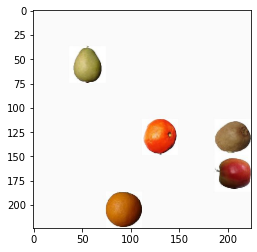

In [150]:
import matplotlib.pyplot as plt

apple_trainSet = GenericFruitDataset("training_merged_images", 'apple', 'training_classes.csv')
apple_validationSet = GenericFruitDataset("validation_merged_images", 'apple', 'validation_classes.csv')
apple_testSet = GenericFruitDataset("Test/test_set", 'apple', 'test_classes.csv')

clementine_trainSet = GenericFruitDataset("training_merged_images", 'clementine', 'training_classes.csv')
clementine_validationSet = GenericFruitDataset("validation_merged_images", 'clementine', 'validation_classes.csv')
clementine_testSet = GenericFruitDataset("Test/test_set", 'clementine', 'test_classes.csv')

kiwi_trainSet = GenericFruitDataset("training_merged_images", 'kiwi', 'training_classes.csv')
kiwi_validationSet = GenericFruitDataset("validation_merged_images", 'kiwi', 'validation_classes.csv')
kiwi_testSet = GenericFruitDataset("Test/test_set", 'kiwi', 'test_classes.csv')

orange_trainSet = GenericFruitDataset("training_merged_images", 'orange', 'training_classes.csv')
orange_validationSet = GenericFruitDataset("validation_merged_images", 'orange', 'validation_classes.csv')
orange_testSet = GenericFruitDataset("Test/test_set", 'orange', 'test_classes.csv')

pear_trainSet = GenericFruitDataset("training_merged_images", 'pear', 'training_classes.csv')
pear_validationSet = GenericFruitDataset("validation_merged_images", 'pear', 'validation_classes.csv')
pear_testSet = GenericFruitDataset("Test/test_set", 'pear', 'test_classes.csv')

images, labels = apple_trainSet.__getitem__(5)
plt.figure()
plt.imshow(images.permute(1, 2, 0))
print(labels)

Creating dataloaders with batchsize, and printing shapes

Feature batch shape: torch.Size([8, 3, 224, 224])
Labels batch shape: torch.Size([8, 1])


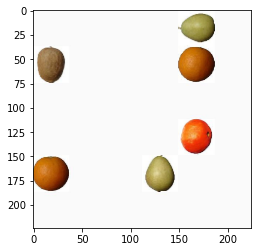

Label: tensor([0])


In [151]:
# Create dataloaders
BATCH_SIZE = 8
apple_train_dataloader = DataLoader(dataset=apple_trainSet, batch_size=BATCH_SIZE, shuffle=True)
apple_validation_dataloader = DataLoader(dataset=apple_validationSet, batch_size=BATCH_SIZE, shuffle=True)
apple_test_dataloader = DataLoader(dataset=apple_testSet, batch_size=BATCH_SIZE, shuffle=True)

clementine_train_dataloader = DataLoader(dataset=clementine_trainSet, batch_size=BATCH_SIZE, shuffle=True)
clementine_validation_dataloader = DataLoader(dataset=clementine_validationSet, batch_size=BATCH_SIZE, shuffle=True)
clementine_test_dataloader = DataLoader(dataset=clementine_testSet, batch_size=BATCH_SIZE, shuffle=True)

kiwi_train_dataloader = DataLoader(dataset=kiwi_trainSet, batch_size=BATCH_SIZE, shuffle=True)
kiwi_validation_dataloader = DataLoader(dataset=kiwi_validationSet, batch_size=BATCH_SIZE, shuffle=True)
kiwi_test_dataloader = DataLoader(dataset=kiwi_testSet, batch_size=BATCH_SIZE, shuffle=True)

orange_train_dataloader = DataLoader(dataset=orange_trainSet, batch_size=BATCH_SIZE, shuffle=True)
orange_validation_dataloader = DataLoader(dataset=orange_validationSet, batch_size=BATCH_SIZE, shuffle=True)
orange_test_dataloader = DataLoader(dataset=orange_testSet, batch_size=BATCH_SIZE, shuffle=True)

pear_train_dataloader = DataLoader(dataset=pear_trainSet, batch_size=BATCH_SIZE, shuffle=True)
pear_validation_dataloader = DataLoader(dataset=pear_validationSet, batch_size=BATCH_SIZE, shuffle=True)
pear_test_dataloader = DataLoader(dataset=pear_testSet, batch_size=BATCH_SIZE, shuffle=True)

train_features, train_labels = next(iter(apple_train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0), cmap="gray")
plt.show()
print(f"Label: {label}")

# Creating model

In [82]:
# models
model_apple = resnet18(pretrained=True)
model_clementine = resnet18(pretrained=True)
model_kiwi = resnet18(pretrained=True)
model_orange = resnet18(pretrained=True)
model_pear = resnet18(pretrained=True)

#models = [model_apple]
models = [model_apple, model_clementine, model_kiwi, model_orange, model_pear]

for model in models:
    # Freeze layer 1 2 3 
    for params in model.layer1.parameters():
        params.requires_grad = False
    for params in model.layer2.parameters():
        params.requires_grad = False

    # Replace Output of Fully Connected Layer with Number of Labels for our Classification Problem
    model.fc = Linear(in_features=512, out_features=1)

c:\Users\danie\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\danie\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [83]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model_apple)

+------------------------------+------------+
|           Modules            | Parameters |
+------------------------------+------------+
|         conv1.weight         |    9408    |
|          bn1.weight          |     64     |
|           bn1.bias           |     64     |
|    layer3.0.conv1.weight     |   294912   |
|     layer3.0.bn1.weight      |    256     |
|      layer3.0.bn1.bias       |    256     |
|    layer3.0.conv2.weight     |   589824   |
|     layer3.0.bn2.weight      |    256     |
|      layer3.0.bn2.bias       |    256     |
| layer3.0.downsample.0.weight |   32768    |
| layer3.0.downsample.1.weight |    256     |
|  layer3.0.downsample.1.bias  |    256     |
|    layer3.1.conv1.weight     |   589824   |
|     layer3.1.bn1.weight      |    256     |
|      layer3.1.bn1.bias       |    256     |
|    layer3.1.conv2.weight     |   589824   |
|     layer3.1.bn2.weight      |    256     |
|      layer3.1.bn2.bias       |    256     |
|    layer4.0.conv1.weight     |  

10503489

In [85]:
# finding length of train and validation set.
import fnmatch

lenOfTrain = len(fnmatch.filter(os.listdir('training_merged_images'), '*.jpg'))
lenOfVal = len(fnmatch.filter(os.listdir('validation_merged_images'), '*.jpg'))
lenOfTest = len(fnmatch.filter(os.listdir('Test/test_set'), '*.jpg'))

print(lenOfTrain)
print(lenOfVal)
print(lenOfTest)

2500
500
31


Training and validating model

In [87]:
train_acc = []

for model in models:
  optimiser = Adam(model.parameters(), lr=0.0003, weight_decay=0.0001)
  loss_fn = nn.MSELoss()

  train = 0

  if model == model_apple:
    print("Apple model")
    train = apple_train_dataloader
  elif model == model_clementine:
    print("Clementine model")
    train = clementine_train_dataloader
  elif model == model_kiwi:
    print("Kiwi model")
    train = kiwi_train_dataloader
  elif model == model_orange:
    print("Orange model")
    train = orange_train_dataloader
  elif model == model_pear:
    print("Pear model")
    train =pear_train_dataloader

  for epoch in range(2):
      start = time()
      
      tr_acc = 0

      predLabels = np.empty((0,))
      trueLabels = np.empty((0,))

      # Train
      model.train()
      
      with tqdm(train, unit="batch") as tepoch:
          for xtrain, ytrain in tepoch:
              xtrain = xtrain.float()
              ytrain = ytrain.float()
              optimiser.zero_grad()
              
              train_prob = model(xtrain)
              train_prob = train_prob.cpu()
              
              loss = loss_fn(train_prob, ytrain)
              loss.backward()
              optimiser.step()
              
              # training ends              
              train_pred = abs(torch.round(train_prob))
              tr_acc += int(torch.sum(torch.eq(train_pred,ytrain)))

              predLabels = np.append(predLabels, train_pred.detach().numpy())
              trueLabels = np.append(trueLabels, ytrain)
              train_acc.append(np.mean(predLabels == trueLabels))

          ep_tr_acc = tr_acc / (lenOfTrain)     #len train set
          predLabels = np.empty((0,))
          trueLabels = np.empty((0,))

      end = time()
      duration = (end - start) / 60
      
      print(f"Epoch: {epoch}, Time: {duration}, Loss: {loss}\nTrain_acc: {ep_tr_acc}")

  0%|          | 0/313 [00:00<?, ?batch/s]

Apple model


  0%|          | 0/313 [00:00<?, ?batch/s]

Epoch: 0, Time: 5.56420867840449, Loss: 0.12848490476608276
Train_acc: 0.8476


  0%|          | 0/313 [00:00<?, ?batch/s]

Epoch: 1, Time: 5.659854276974996, Loss: 0.0014252294786274433
Train_acc: 0.9936
Clementine model


  0%|          | 0/313 [00:00<?, ?batch/s]

Epoch: 0, Time: 5.84867305358251, Loss: 0.025144483894109726
Train_acc: 0.8272


  0%|          | 0/313 [00:00<?, ?batch/s]

Epoch: 1, Time: 5.164702725410462, Loss: 0.051743149757385254
Train_acc: 0.9796
Kiwi model


  0%|          | 0/313 [00:00<?, ?batch/s]

Epoch: 0, Time: 5.527220324675242, Loss: 0.005197105463594198
Train_acc: 0.8232


  0%|          | 0/313 [00:00<?, ?batch/s]

Epoch: 1, Time: 5.251752817630768, Loss: 0.008064637891948223
Train_acc: 0.9572
Orange model


  0%|          | 0/313 [00:00<?, ?batch/s]

Epoch: 0, Time: 5.285302686691284, Loss: 0.0030524232424795628
Train_acc: 0.8044


  0%|          | 0/313 [00:00<?, ?batch/s]

Epoch: 1, Time: 5.258279252052307, Loss: 0.012440322898328304
Train_acc: 0.9828
Pear model


  0%|          | 0/313 [00:00<?, ?batch/s]

Epoch: 0, Time: 5.276216904322307, Loss: 0.004825293086469173
Train_acc: 0.8784


100%|██████████| 313/313 [05:11<00:00,  1.01batch/s]

Epoch: 1, Time: 5.18746642669042, Loss: 0.014334539882838726
Train_acc: 0.9916


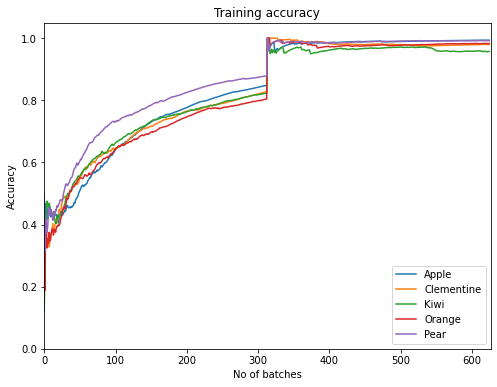

In [108]:
plt.figure(figsize=(8, 6))
plt.plot(train_acc[0:625], label = "Apple")
plt.plot(train_acc[626:1251], label = "Clementine")
plt.plot(train_acc[1252:1877], label = "Kiwi")
plt.plot(train_acc[1878:2503], label = "Orange")
plt.plot(train_acc[2504:3129], label = "Pear")
plt.legend(loc="lower right")
plt.ylim(0,1.05)
plt.xlim(0,626)
plt.xlabel('No of batches')
plt.ylabel('Accuracy')
plt.title('Training accuracy')
plt.show()

Validation

In [107]:
validation_acc = []

for model in models:

  validation = 0
# 
  if model == model_apple:
    print("Apple model")
    validation = apple_validation_dataloader
  elif model == model_clementine:
    print("Clementine model")
    validation = clementine_validation_dataloader
  elif model == model_kiwi:
    print("Kiwi model")
    validation = kiwi_validation_dataloader
  elif model == model_orange:
    print("Orange model")
    validation = orange_validation_dataloader
  elif model == model_pear:
    print("Pear model")
    validation = pear_validation_dataloader

  for epoch in range(1):
      start = time()
    
      va_acc = 0

      predLabels = np.empty((0,))
      trueLabels = np.empty((0,))

      # Evaluate
      model.eval()
      with torch.no_grad() and tqdm(validation, unit="batch") as validation_tepoch:
          for xvalidation, yvalidation in validation_tepoch:
              xvalidation = xvalidation.float()
              yvalidation = yvalidation.float()
              validation_prob = model(xvalidation)
              validation_prob = validation_prob.cpu()
              
              validation_pred = abs(torch.round(validation_prob))
              va_acc += int(torch.sum(torch.eq(validation_pred,yvalidation)))
              
              predLabels = np.append(predLabels, validation_pred.detach().numpy())
              trueLabels = np.append(trueLabels, yvalidation)
              validation_acc.append(np.mean(predLabels == trueLabels))
              
          ep_validation_acc = va_acc / (lenOfVal)     #len of validation set
      
      end = time()
      duration = (end - start) / 60
      
      print(f"Epoch: {epoch}, Time: {duration}, Loss: {loss}\nValidation_acc: {ep_validation_acc}")

  0%|          | 0/63 [00:00<?, ?batch/s]

Apple model


  0%|          | 0/63 [00:00<?, ?batch/s]

Epoch: 0, Time: 0.4522190054257711, Loss: 0.014334539882838726
Validation_acc: 0.998
Clementine model


  0%|          | 0/63 [00:00<?, ?batch/s]

Epoch: 0, Time: 0.4246328592300415, Loss: 0.014334539882838726
Validation_acc: 1.0
Kiwi model


  0%|          | 0/63 [00:00<?, ?batch/s]

Epoch: 0, Time: 0.42466193437576294, Loss: 0.014334539882838726
Validation_acc: 0.982
Orange model


  0%|          | 0/63 [00:00<?, ?batch/s]

Epoch: 0, Time: 0.4126385490099589, Loss: 0.014334539882838726
Validation_acc: 0.984
Pear model


100%|██████████| 63/63 [00:24<00:00,  2.60batch/s]

Epoch: 0, Time: 0.4044149200121562, Loss: 0.014334539882838726
Validation_acc: 1.0


In [113]:
validation_acc[64]

1.0

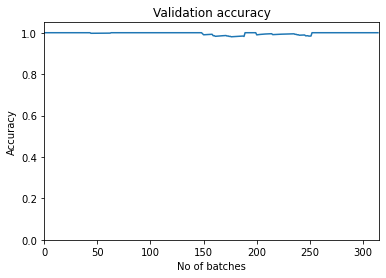

In [109]:
plt.plot(validation_acc[0:62])
plt.ylim(0,1.05)
plt.xlim(0,len(validation_acc))
plt.xlabel('No of batches')
plt.ylabel('Accuracy')
plt.title('Validation accuracy')
plt.show()

# Testing model

Test af random billeder fra testset

Feature batch shape: torch.Size([8, 3, 224, 224])
Labels batch shape: torch.Size([8, 1])


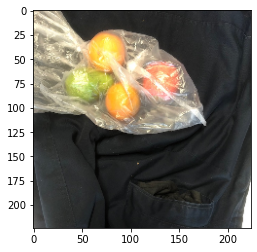

Predicted label: [0.0, 1.0, 1.0, 0.0, 1.0]
True label: [1, 2, 1, 0, 0] 



In [200]:

pred_labels = [0, 0, 0, 0 ,0]
true_labels = [0, 0, 0, 0, 0]
counter = 0

imgNo = 10

images, label1 = apple_validationSet.__getitem__(imgNo)
images, label2 = clementine_validationSet.__getitem__(imgNo)
images, label3 = kiwi_validationSet.__getitem__(imgNo)
images, label4 = orange_validationSet.__getitem__(imgNo)
images, label5 = pear_validationSet.__getitem__(imgNo)

#true_labels = [label1.item(), label2.item(), label3.item(), label4.item(), label5.item(),]

images = cv2.imread('Test/test_set_troll/1_2_0_0_1_t.jpg')
images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
images = cv2.resize(images, (224, 224))

images = torch.from_numpy(images)
images = images.permute(2, 0, 1)

true_labels = [1, 2, 1, 0, 0]

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

plt.imshow(images.permute(1,2,0))
plt.show()

for model in models:
    img_tensor = images.unsqueeze(0)
    pred_prob = model(img_tensor.float())
    pred_labels[counter] = abs(torch.round(pred_prob)).item()
    counter = counter + 1

print("Predicted label:", pred_labels)
print("True label:", true_labels, "\n")

Test entire test set and calculate accuracy

In [152]:
test_acc = []

for model in models:

  test = 0

  if model == model_apple:
    test = apple_test_dataloader
  elif model == model_clementine:
    test = clementine_test_dataloader
  elif model == model_kiwi:
    test = kiwi_test_dataloader
  elif model == model_orange:
    test = orange_test_dataloader
  elif model == model_pear:
    test = pear_test_dataloader

  for epoch in range(1):
      start = time()
    
      te_acc = 0

      predLabels = np.empty((0,))
      trueLabels = np.empty((0,))

      # Evaluate
      model.eval()
      with torch.no_grad() and tqdm(test, unit="batch") as test_tepoch:
          for xtest, ytest in test_tepoch:
              xtest = xtest.float()
              ytest = ytest.float()
              test_prob = model(xtest)
              test_prob = test_prob.cpu()
              
              test_pred = abs(torch.round(test_prob))
              te_acc += int(torch.sum(torch.eq(test_pred,ytest)))
              
              predLabels = np.append(predLabels, test_pred.detach().numpy())
              trueLabels = np.append(trueLabels, ytest)
              test_acc.append(np.mean(predLabels == trueLabels))
              
          ep_test_acc = te_acc / (lenOfTest)     #len of test set
      
      end = time()
      duration = (end - start) / 60
      
      print(f"Epoch: {epoch}, Time: {duration}, Loss: {loss}\nTest_acc: {ep_test_acc}")

  0%|          | 0/4 [00:00<?, ?batch/s]

Epoch: 0, Time: 0.027488974730173747, Loss: 0.014334539882838726
Test_acc: 0.4838709677419355


  0%|          | 0/4 [00:00<?, ?batch/s]

Epoch: 0, Time: 0.028248135248819986, Loss: 0.014334539882838726
Test_acc: 0.3548387096774194


  0%|          | 0/4 [00:00<?, ?batch/s]

Epoch: 0, Time: 0.030814250310262043, Loss: 0.014334539882838726
Test_acc: 0.5806451612903226


  0%|          | 0/4 [00:00<?, ?batch/s]

Epoch: 0, Time: 0.03313813209533691, Loss: 0.014334539882838726
Test_acc: 0.7419354838709677


100%|██████████| 4/4 [00:01<00:00,  2.31batch/s]

Epoch: 0, Time: 0.02896348237991333, Loss: 0.014334539882838726
Test_acc: 0.4838709677419355


Test on data with other objects and a dark background

Predicted label: 2.0 - Predicted probability: 1.6099648475646973
True label: 1 

Predicted label: 3.0 - Predicted probability: 2.7306790351867676
True label: 0 

Predicted label: 0.0 - Predicted probability: 0.4217650592327118
True label: 1 

Predicted label: 3.0 - Predicted probability: 3.0401554107666016
True label: 1 



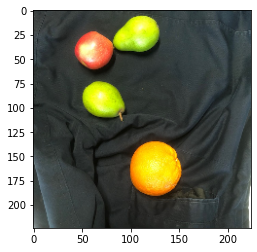

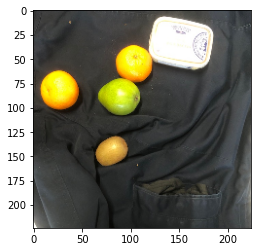

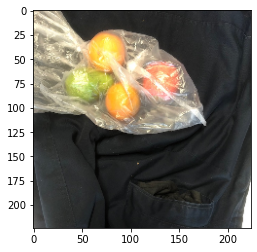

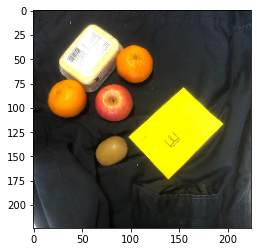

In [194]:
# Model Performance
from PIL import Image
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

img = cv2.imread('Test/test_set_troll/1_0_0_1_2_t.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img_tensor = torch.from_numpy(img)
img_tensor1 = img_tensor.permute(2, 0, 1)

img = cv2.imread('Test/test_set_troll/0_2_1_0_1_t.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img_tensor = torch.from_numpy(img)
img_tensor2 = img_tensor.permute(2, 0, 1)

img = cv2.imread('Test/test_set_troll/1_2_0_0_1_t.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img_tensor = torch.from_numpy(img)
img_tensor3 = img_tensor.permute(2, 0, 1)

img = cv2.imread('Test/test_set_troll/1_2_1_0_0_t.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img_tensor = torch.from_numpy(img)
img_tensor4 = img_tensor.permute(2, 0, 1)


sample_list = [(img_tensor1, torch.tensor([1])),
               (img_tensor2, torch.tensor([0])),
               (img_tensor3, torch.tensor([1])),
               (img_tensor4, torch.tensor([1]))]

for image,label in sample_list:
    plt.figure()
    plt.imshow(image.permute(1, 2, 0))
    img_tensor = image.unsqueeze(0)
    pred_prob = model_orange(img_tensor.float())
    pred = abs(torch.round(pred_prob))
    print("Predicted label:", pred.item(),  "- Predicted probability:", pred_prob.item())
    print("True label:", label.item(), "\n")